<!-- dom:TITLE: Data Analysis and Machine Learning  Lectures: Optimization and  Gradient Methods -->
# Data Analysis and Machine Learning  Lectures: Optimization and  Gradient Methods
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Sep 21, 2018**

Copyright 1999-2018, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Optimization, the central part of any Machine Learning algortithm

Almost every problem in machine learning and data science starts with
a dataset $X$, a model $g(\beta)$, which is a function of the
parameters $\beta$ and a cost function $C(X, g(\beta))$ that allows
us to judge how well the model $g(\beta)$ explains the observations
$X$. The model is fit by finding the values of $\beta$ that minimize
the cost function. Ideally we would be able to solve for $\beta$
analytically, however this is not possible in general and we must use
some approximative/numerical method to compute the minimum.

## Steepest descent

The method of steepest descent The basic idea of gradient descent is
that a function $F(\mathbf{x})$, 
$\mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

It can be shown that if

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

with $\gamma_k > 0$.

For $\gamma_k$ small enough, then $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma_k$
we are always moving towards smaller function values, i.e a minimum.

<!-- !split  -->
## More on Steepest descent

The previous observation is the basis of the method of steepest
descent, which is also referred to as just gradient descent (GD). One
starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and
computes new approximations according to

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k), \ \ k \geq 0.
$$

The parameter $\gamma_k$ is often referred to as the step length or
the learning rate within the context of Machine Learning.

<!-- !split  -->
## The ideal

Ideally the sequence $\{\mathbf{x}_k \}_{k=0}$ converges to a global
minimum of the function $F$. In general we do not know if we are in a
global or local minimum. In the special case when $F$ is a convex
function, all local minima are also global minima, so in this case
gradient descent can converge to the global solution. The advantage of
this scheme is that it is conceptually simple and straightforward to
implement. However the method in this form has some severe
limitations:

In machine learing we are often faced with non-convex high dimensional
cost functions with many local minima. Since GD is deterministic we
will get stuck in a local minimum, if the method converges, unless we
have a very good intial guess. This also implies that the scheme is
sensitive to the chosen initial condition.

Note that the gradient is a function of $\mathbf{x} =
(x_1,\cdots,x_n)$ which makes it expensive to compute numerically.


<!-- !split  -->
## The sensitiveness of the gradient descent

The gradient descent method 
is sensitive to the choice of learning rate $\gamma_k$. This is due
to the fact that we are only guaranteed that $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$ for sufficiently small $\gamma_k$. The problem is to
determine an optimal learning rate. If the learning rate is chosen too
small the method will take a long time to converge and if it is too
large we can experience erratic behavior.

Many of these shortcomings can be alleviated by introducing
randomness. One such method is that of Stochastic Gradient Descent
(SGD), see below.


<!-- !split  -->
## Convex functions

Ideally we want our cost/loss function to be convex(concave).

First we give the definition of a convex set: A set $C$ in
$\mathbb{R}^n$ is said to be convex if, for all $x$ and $y$ in $C$ and
all $t \in (0,1)$ , the point $(1 − t)x + ty$ also belongs to
C. Geometrically this means that every point on the line segment
connecting $x$ and $y$ is in $C$ as discussed below.

The convex subsets of $\mathbb{R}$ are the intervals of
$\mathbb{R}$. Examples of convex sets of $\mathbb{R}^2$ are the
regular polygons (triangles, rectangles, pentagons, etc...).

## Convex function

**Convex function**: Let $X \subset \mathbb{R}^n$ be a convex set. Assume that the function $f: X \rightarrow \mathbb{R}$ is continuous, then $f$ is said to be convex if $$f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2) $$ for all $x_1, x_2 \in X$ and for all $t \in [0,1]$. If $\leq$ is replaced with a strict inequaltiy in the definition, we demand $x_1 \neq x_2$ and $t\in(0,1)$ then $f$ is said to be strictly convex. For a single variable function, convexity means that if you draw a straight line connecting $f(x_1)$ and $f(x_2)$, the value of the function on the interval $[x_1,x_2]$ is always below the line as illustrated below.

## Conditions on convex functions

In the following we state first and second-order conditions which
ensures convexity of a function $f$. We write $D_f$ to denote the
domain of $f$, i.e the subset of $R^n$ where $f$ is defined. For more
details and proofs we refer to: [S. Boyd and L. Vandenberghe. Convex Optimization. Cambridge University Press](http://stanford.edu/boyd/cvxbook/, 2004).

**First order condition.**

Suppose $f$ is differentiable (i.e $\nabla f(x)$ is well defined for
all $x$ in the domain of $f$). Then $f$ is convex if and only if $D_f$
is a convex set and $$f(y) \geq f(x) + \nabla f(x)^T (y-x) $$ holds
for all $x,y \in D_f$. This condition means that for a convex function
the first order Taylor expansion (right hand side above) at any point
a global under estimator of the function. To convince yourself you can
make a drawing of $f(x) = x^2+1$ and draw the tangent line to $f(x)$ and
note that it is always below the graph.



**Second order condition.**

Assume that $f$ is twice
differentiable, i.e the Hessian matrix exists at each point in
$D_f$. Then $f$ is convex if and only if $D_f$ is a convex set and its
Hessian is positive semi-definite for all $x\in D_f$. For a
single-variable function this reduces to $f''(x) \geq 0$. Geometrically this means that $f$ has nonnegative curvature
everywhere.



This condition is particularly useful since it gives us an procedure for determining if the function under consideration is convex, apart from using the definition.

## More on convex functions

The next result is of great importance to us and the reason why we are
going on about convex functions. In machine learning we frequently
have to minimize a loss/cost function in order to find the best
parameters for the model we are considering. 

Ideally we want the
global minimum (for high-dimensional models it is hard to know
if we have local or global minimum). However, if the cost/loss function
is convex the following result provides invaluable information:

**Any minimum is global for convex functions.**

Consider the problem of finding $x \in \mathbb{R}^n$ such that $f(x)$
is minimal, where $f$ is convex and differentiable. Then, any point
$x^*$ that satisfies $\nabla f(x^*) = 0$ is a global minimum.



This result means that if we know that the cost/loss function is convex and we are able to find a minimum, we are guaranteed that it is a global minimum.

## Some simple problems

1. Show that $f(x)=x^2$ is convex for $x \in \mathbb{R}$ using the definition of convexity. Hint: If you re-write the definition, $f$ is convex if the following holds for all $x,y \in D_f$ and any $\lambda \in [0,1]$ $\lambda f(x)+(1-\lambda)f(y)-f(\lambda x + (1-\lambda) y ) \geq 0$.

2. Using the second order condition show that the following functions are convex on the specified domain.

 * $f(x) = e^x$ is convex for $x \in \mathbb{R}$.

 * $g(x) = -\ln(x)$ is convex for $x \in (0,\infty)$.


3. Let $f(x) = x^2$ and $g(x) = e^x$. Show that $f(g(x))$ and $g(f(x))$ is convex for $x \in \mathbb{R}$. Also show that if $f(x)$ is any convex function than $h(x) = e^{f(x)}$ is convex.

4. A norm is any function that satisfy the following properties

 * $f(\alpha x) = |\alpha| f(x)$ for all $\alpha \in \mathbb{R}$.

 * $f(x+y) \leq f(x) + f(y)$

 * $f(x) \leq 0$ for all $x \in \mathbb{R}^n$ with equality if and only if $x = 0$


Using the definition of convexity, try to show that a function satisfying the properties above is convex (the third condition is not needed to show this).

<!-- !split  -->
## Revisiting our first homework

We will use linear regression as a case study for the gradient descent
methods. Linear regression is a great test case for the gradient
descent methods discussed in the lectures since it has several
desirable properties such as:

1. An analytical solution (recall homework set 1).

2. The gradient can be computed analytically.

3. The cost function is convex which guarantees that gradient descent converges for small enough learning rates

We revisit the example from homework set 1 where we had

$$
y_i = 5x_i^2 + 0.1\xi_i, \ i=1,\cdots,100
$$

with $x_i \in [0,1] $ chosen randomly with a uniform distribution. Additionally $\xi_i$ represents stochastic noise chosen according to a normal distribution $\cal {N}(0,1)$. 
The linear regression model is given by

$$
h_\beta(x) = \hat{y} = \beta_0 + \beta_1 x,
$$

such that

$$
\hat{y}_i = \beta_0 + \beta_1 x_i.
$$

<!-- !split  -->
## Gradient descent example

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$, $\mathbf{\hat{y}} = (\hat{y}_1,\cdots,\hat{y}_n)^T$ and $\beta = (\beta_0, \beta_1)^T$

It is convenient to write $\mathbf{\hat{y}} = X\beta$ where $X \in \mathbb{R}^{100 \times 2} $ is the design matrix given by

$$
X \equiv \begin{bmatrix}
1 &amp; x_1  \\
\vdots &amp; \vdots  \\
1 &amp; x_{100} &amp;  \\
\end{bmatrix}.
$$

The loss function is given by

$$
C(\beta) = ||X\beta-\mathbf{y}||^2 = ||X\beta||^2 - 2 \mathbf{y}^T X\beta + ||\mathbf{y}||^2 = \sum_{i=1}^{100} (\beta_0 + \beta_1 x_i)^2 - 2 y_i (\beta_0 + \beta_1 x_i) + y_i^2
$$

and we want to find $\beta$ such that $C(\beta)$ is minimized.

## The derivative of the cost/loss function

Computing $\partial C(\beta) / \partial \beta_0$ and $\partial C(\beta) / \partial \beta_1$ we can show  that the gradient can be written as

$$
\nabla_{\beta} C(\beta) = (\partial C(\beta) / \partial \beta_0, \partial C(\beta) / \partial \beta_1)^T = 2\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = 2X^T(X\beta - \mathbf{y}),
$$

where $X$ is the design matrix defined above.

## The Hessian matrix
The Hessian matrix of $C(\beta)$ is given by

$$
\hat{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\beta)}{\partial \beta_0^2} &amp; \frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1}  \\
\frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1} &amp; \frac{\partial^2 C(\beta)}{\partial \beta_1^2} &amp;  \\
\end{bmatrix} = 2X^T X.
$$

This result implies that $C(\beta)$ is a convex function since the matrix $X^T X$ always is positive semi-definite.

## Simple program

We can now write a program that minimizes $C(\beta)$ using the gradient descent method with a constant learning rate $\gamma$ according to

$$
\beta_{k+1} = \beta_k - \gamma \nabla_\beta C(\beta_k), \ k=0,1,\cdots
$$

We can use the expression we computed for the gradient and let use a
$\beta_0$ be chosen randomly and let $\gamma = 0.001$. Stop iterating
when $||\nabla_\beta C(\beta_k) || \leq \epsilon = 10^{-8}$. 

And finally we can compare our solution for $\beta$ with the analytic result given by 
$\beta= (X^TX)^{-1} X^T \mathbf{y}$.

In [1]:
import numpy as np

"""
The following setup is just a suggestion, feel free to write it the way you like.
"""

#Setup problem described in the exercise
N  = 100 #Nr of datapoints
M  = 2 #Nr of features
x  = np.random.rand(N) #Uniformly generated x-values in [0,1]
y  = 5*x**2 + 0.1*np.random.randn(N)
X  = np.c_[np.ones(N),x] #Construct design matrix

#Compute beta according to normal equations to compare with GD solution
Xt_X_inv = np.linalg.inv(np.dot(X.T,X))
Xt_y     = np.dot(X.transpose(),y)
beta_NE = np.dot(Xt_X_inv,Xt_y)
print(beta_NE)

## Gradient Descent Example

Another simple example is here

[[4.11631855]
 [2.78555876]]
[[4.11631855]
 [2.78555876]]


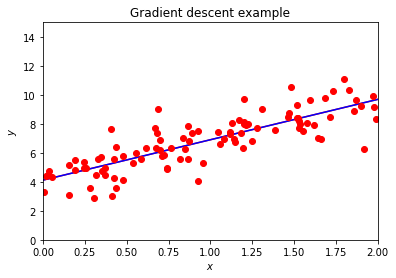

In [6]:
%matplotlib inline


# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
beta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 0.1
Niterations = 1000
m = 100

for iter in range(Niterations):
    gradients = 2.0/m*xb.T.dot(xb.dot(beta)-y)
    beta -= eta*gradients

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

## And a corresponding example using **scikit-learn**

In [3]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
beta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(beta_linreg)
sgdreg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print(sgdreg.intercept_, sgdreg.coef_)

<!-- !split  -->
## Gradient descent and Ridge

We have also discussed Ridge regression where the loss function contains a regularized given by the $L_2$ norm of $\beta$,

$$
C_{\text{ridge}}(\beta) = ||X\beta -\mathbf{y}||^2 + \lambda ||\beta||^2, \ \lambda \geq 0.
$$

In order to minimize $C_{\text{ridge}}(\beta)$ using GD we only have adjust the gradient as follows

$$
\nabla_\beta C_{\text{ridge}}(\beta)  = 2\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} + 2\lambda\begin{bmatrix} \beta_0 \\ \beta_1\end{bmatrix} = 2 (X^T(X\beta - \mathbf{y})+\lambda \beta).
$$

We can now extend our program to minimize $C_{\text{ridge}}(\beta)$ using gradient descent and compare with the analytical solution given by

$$
\beta_{\text{ridge}} = \left(X^T X + \lambda I_{2 \times 2} \right)^{-1} X^T \mathbf{y},
$$

for $\lambda = {0,1,10,50,100}$ ($\lambda = 0$ corresponds to ordinary least squares). 
We can then compute $||\beta_{\text{ridge}}||$ for each $\lambda$.

In [4]:
import numpy as np

"""
The following setup is just a suggestion, feel free to write it the way you like.
"""

#Setup problem described in the exercise
N  = 100 #Nr of datapoints
M  = 2   #Nr of features
x  = np.random.rand(N)
y  = 5*x**2 + 0.1*np.random.randn(N)


#Compute analytic beta for Ridge regression 
X    = np.c_[np.ones(N),x]
XT_X = np.dot(X.T,X)

l  = 0.1 #Ridge parameter lambda
Id = np.eye(XT_X.shape[0])

Z = np.linalg.inv(XT_X+l*Id)
beta_ridge = np.dot(Z,np.dot(X.T,y))

print(beta_ridge)
print(np.linalg.norm(beta_ridge)) #||beta||

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\beta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example
As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\beta}
C(\mathbf{\beta}) = \sum_{i=1}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}) \rightarrow \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [5]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\beta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\gamma_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all.

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\gamma_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\beta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\beta$ that gives the lowest value of the cost
function.

In [6]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

gamma_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for beta
        t = epoch*m+i
        gamma_j = step_length(t,t0,t1)
        j += 1

print("gamma_j after %d epochs: %g" % (n_epochs,gamma_j))

## Conjugate gradient (CG) method
The success of the CG method  for finding solutions of non-linear problems is based
on the theory of conjugate gradients for linear systems of equations. It belongs
to the class of iterative methods for solving problems from linear algebra of the type

$$
\hat{A}\hat{x} = \hat{b}.
$$

In the iterative process we end up with a problem like

$$
\hat{r}= \hat{b}-\hat{A}\hat{x},
$$

where $\hat{r}$ is the so-called residual or error in the iterative process.

When we have found the exact solution, $\hat{r}=0$.




## Conjugate gradient method

The residual is zero when we reach the minimum of the quadratic equation

$$
P(\hat{x})=\frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T\hat{b},
$$

with the constraint that the matrix $\hat{A}$ is positive definite and symmetric.
If we search for a minimum of the quantum mechanical  variance, then the matrix 
$\hat{A}$, which is called the Hessian, is given by the second-derivative of the function we want to minimize.  This quantity is always positive definite.  In our case this corresponds normally to the second derivative of the energy.







## Conjugate gradient method, Newton's method first
We seek the minimum of the energy or the variance as function of various variational parameters. 
In our case we have thus a function $f$ whose minimum we are seeking.
In Newton's method we set $\nabla f = 0$ and we can thus compute the next iteration point

$$
\hat{x}-\hat{x}_i=\hat{A}^{-1}\nabla f(\hat{x}_i).
$$

Subtracting this equation from that of $\hat{x}_{i+1}$ we have

$$
\hat{x}_{i+1}-\hat{x}_i=\hat{A}^{-1}(\nabla f(\hat{x}_{i+1})-\nabla f(\hat{x}_i)).
$$

## Conjugate gradient method
In the CG method we define so-called conjugate directions and two vectors 
$\hat{s}$ and $\hat{t}$
are said to be
conjugate if

$$
\hat{s}^T\hat{A}\hat{t}= 0.
$$

The philosophy of the CG method is to perform searches in various conjugate directions
of our vectors $\hat{x}_i$ obeying the above criterion, namely

$$
\hat{x}_i^T\hat{A}\hat{x}_j= 0.
$$

Two vectors are conjugate if they are orthogonal with respect to 
this inner product. Being conjugate is a symmetric relation: if $\hat{s}$ is conjugate to $\hat{t}$, then $\hat{t}$ is conjugate to $\hat{s}$.



## Conjugate gradient method
An example is given by the eigenvectors of the matrix

$$
\hat{v}_i^T\hat{A}\hat{v}_j= \lambda\hat{v}_i^T\hat{v}_j,
$$

which is zero unless $i=j$.




## Conjugate gradient method
Assume now that we have a symmetric positive-definite matrix $\hat{A}$ of size
$n\times n$. At each iteration $i+1$ we obtain the conjugate direction of a vector

$$
\hat{x}_{i+1}=\hat{x}_{i}+\alpha_i\hat{p}_{i}.
$$

We assume that $\hat{p}_{i}$ is a sequence of $n$ mutually conjugate directions. 
Then the $\hat{p}_{i}$  form a basis of $R^n$ and we can expand the solution 
$  \hat{A}\hat{x} = \hat{b}$ in this basis, namely

$$
\hat{x}  = \sum^{n}_{i=1} \alpha_i \hat{p}_i.
$$

## Conjugate gradient method
The coefficients are given by

$$
\mathbf{A}\mathbf{x} = \sum^{n}_{i=1} \alpha_i \mathbf{A} \mathbf{p}_i = \mathbf{b}.
$$

Multiplying with $\hat{p}_k^T$  from the left gives

$$
\hat{p}_k^T \hat{A}\hat{x} = \sum^{n}_{i=1} \alpha_i\hat{p}_k^T \hat{A}\hat{p}_i= \hat{p}_k^T \hat{b},
$$

and we can define the coefficients $\alpha_k$ as

$$
\alpha_k = \frac{\hat{p}_k^T \hat{b}}{\hat{p}_k^T \hat{A} \hat{p}_k}
$$

## Conjugate gradient method and iterations

If we choose the conjugate vectors $\hat{p}_k$ carefully, 
then we may not need all of them to obtain a good approximation to the solution 
$\hat{x}$. 
We want to regard the conjugate gradient method as an iterative method. 
This will us to solve systems where $n$ is so large that the direct 
method would take too much time.

We denote the initial guess for $\hat{x}$ as $\hat{x}_0$. 
We can assume without loss of generality that

$$
\hat{x}_0=0,
$$

or consider the system

$$
\hat{A}\hat{z} = \hat{b}-\hat{A}\hat{x}_0,
$$

instead.




## Conjugate gradient method
One can show that the solution $\hat{x}$ is also the unique minimizer of the quadratic form

$$
f(\hat{x}) = \frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T \hat{x} , \quad \hat{x}\in\mathbf{R}^n.
$$

This suggests taking the first basis vector $\hat{p}_1$ 
to be the gradient of $f$ at $\hat{x}=\hat{x}_0$, 
which equals

$$
\hat{A}\hat{x}_0-\hat{b},
$$

and 
$\hat{x}_0=0$ it is equal $-\hat{b}$.
The other vectors in the basis will be conjugate to the gradient, 
hence the name conjugate gradient method.




## Conjugate gradient method
Let  $\hat{r}_k$ be the residual at the $k$-th step:

$$
\hat{r}_k=\hat{b}-\hat{A}\hat{x}_k.
$$

Note that $\hat{r}_k$ is the negative gradient of $f$ at 
$\hat{x}=\hat{x}_k$, 
so the gradient descent method would be to move in the direction $\hat{r}_k$. 
Here, we insist that the directions $\hat{p}_k$ are conjugate to each other, 
so we take the direction closest to the gradient $\hat{r}_k$  
under the conjugacy constraint. 
This gives the following expression

$$
\hat{p}_{k+1}=\hat{r}_k-\frac{\hat{p}_k^T \hat{A}\hat{r}_k}{\hat{p}_k^T\hat{A}\hat{p}_k} \hat{p}_k.
$$

## Conjugate gradient method
We can also  compute the residual iteratively as

$$
\hat{r}_{k+1}=\hat{b}-\hat{A}\hat{x}_{k+1},
$$

which equals

$$
\hat{b}-\hat{A}(\hat{x}_k+\alpha_k\hat{p}_k),
$$

or

$$
(\hat{b}-\hat{A}\hat{x}_k)-\alpha_k\hat{A}\hat{p}_k,
$$

which gives

$$
\hat{r}_{k+1}=\hat{r}_k-\hat{A}\hat{p}_{k},
$$